In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootdir = os.path.dirname(os.path.dirname(currentdir))
sys.path.insert(0,rootdir) 
from config import data_path,output_path

In [2]:
desktop_optimized_folder =f'{data_path}\\fps_performance\\desktop\\optimized'
desktop_unoptimized_folder =f'{data_path}\\fps_performance\\desktop\\unoptimized'

laptop_optimized_folder =f'{data_path}\\fps_performance\\laptop\\optimized'
laptop_unoptimized_folder =f'{data_path}\\fps_performance\\laptop\\unoptimized'

In [3]:
output_folder = output_path

In [4]:
import dill

import numpy as np

In [5]:
def load_data(folder):
    data = []  
    for filename in os.listdir(folder):
        if not filename.endswith(".ini"):
            with open(f"{folder}/{filename}", "rb") as f:
                x = dill.load(f)
                mean = np.average(x)
                data.append(1/mean)
    data = data[3:33]
    return data

def stats(line,array):
    print(f"{line}: {np.mean(array)} +- {np.std(array)}")

In [6]:
laptop_opt = load_data(laptop_optimized_folder)
stats("laptop_opt", laptop_opt)

desktop_opt = load_data(desktop_optimized_folder)
stats("desktop_opt", desktop_opt)

laptop_un = load_data(laptop_unoptimized_folder)
stats("laptop_un", laptop_un)

desktop_un =  load_data(desktop_unoptimized_folder)
stats("desktop_un", desktop_un)

laptop_opt: 15.931614854359275 +- 0.1071433370415828
desktop_opt: 23.364269924415392 +- 0.2457377310474982
laptop_un: 6.258625301513096 +- 0.0354948151012946
desktop_un: 9.446275174742928 +- 0.09875494031504824


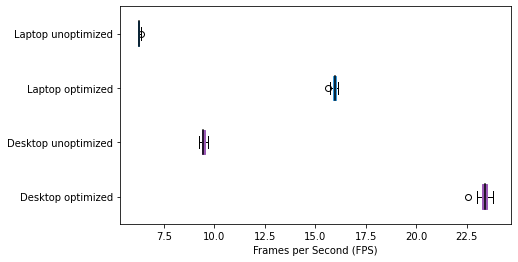

In [7]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)

data = list(reversed([laptop_un,laptop_opt, desktop_un, desktop_opt]))
data_labels = list(reversed(["Laptop unoptimized","Laptop optimized","Desktop unoptimized","Desktop optimized"]))


medianprops = dict(linestyle='-', linewidth=1.5, color='black')
fig1, ax1 = plt.subplots()
box = ax1.boxplot(data,notch=False, patch_artist=True, medianprops=medianprops, vert=False)
ax1.set_yticklabels(data_labels)

plt.xlabel("Frames per Second (FPS)")
colors = ['#9B59B6', '#9B59B6', '#3498DB', '#3498DB', ]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(color)

plt.savefig(f"{output_folder}/fps_performance.pdf",bbox_inches='tight', transparent="True", pad_inches=0)
plt.show() 


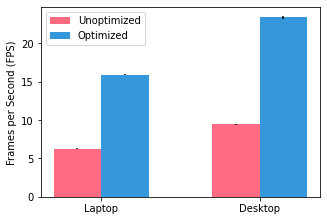

In [8]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (5,3.5)

df = pandas.DataFrame(dict(graph=['Laptop','Desktop'],
                           unopt=[np.mean(laptop_un),np.mean(desktop_un)], 
                           opt=[np.mean(laptop_opt),np.mean(desktop_opt)])) 

ind = np.arange(len(df))
width = 0.3

fig, ax = plt.subplots()
ax.bar(ind , df.unopt, width, 
        color='#ff6b81', 
        label='Unoptimized', 
        yerr=[np.std(laptop_un),np.std(desktop_un)],
        capsize=0
       )
ax.bar(ind+ width, df.opt, width, color='#3498db', label='Optimized',  
        yerr=[np.std(laptop_opt),np.std(desktop_opt)],
        capsize=0
       )


ax.set(xticks=ind + width/2, xticklabels=df.graph)
ax.legend()
plt.ylabel("Frames per Second (FPS)")

plt.savefig(f"{output_folder}/fps_performance.pdf",bbox_inches='tight', transparent="True", pad_inches=0)
plt.show() 
